# A 160000 neuron network with cubic shape

In [7]:
import os
#network_path = "/home/zmd/Snudda/10000Sim"
network_path = "/home/zmd/Snudda/160000Sim"

## 1. Analyse network connectivity

In [8]:
import os
from snudda.analyse import SnuddaAnalyse

network_file = os.path.join(network_path ,"network-putative-synapses-MERGED.hdf5")
dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)

5000000
nSynapses = 2437164551, at 1916000000
nSynapses = 2437164551, at 1917000000
nSynapses = 2437164551, at 1918000000
nSynapses = 2437164551, at 1919000000
nSynapses = 2437164551, at 1920000000
nSynapses = 2437164551, at 1921000000
nSynapses = 2437164551, at 1922000000
nSynapses = 2437164551, at 1923000000
nSynapses = 2437164551, at 1924000000
nSynapses = 2437164551, at 1925000000
nSynapses = 2437164551, at 1926000000
nSynapses = 2437164551, at 1927000000
nSynapses = 2437164551, at 1928000000
nSynapses = 2437164551, at 1929000000
nSynapses = 2437164551, at 1930000000
nSynapses = 2437164551, at 1931000000
nSynapses = 2437164551, at 1932000000
nSynapses = 2437164551, at 1933000000
nSynapses = 2437164551, at 1934000000
nSynapses = 2437164551, at 1935000000
nSynapses = 2437164551, at 1936000000
nSynapses = 2437164551, at 1937000000
nSynapses = 2437164551, at 1938000000
nSynapses = 2437164551, at 1939000000
nSynapses = 2437164551, at 1940000000
nSynapses = 2437164551, at 1941000000
nSyn

This plots a histogram showing how many iSPN neurons connect to each dSPN neuron.

Calculating number of incoming connections iSPN -> dSPN
Centering in Striatum : Keeping 302/75169
#pre = 75169, #post = 302


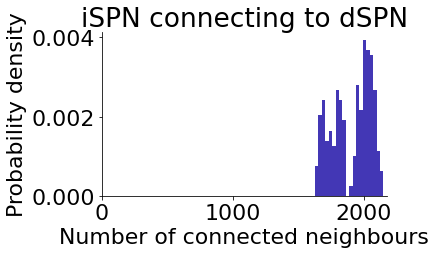

Wrote /home/zmd/Snudda/160000Sim/figures/Network-synapses-input-to-dSPN-from-iSPN.pdf


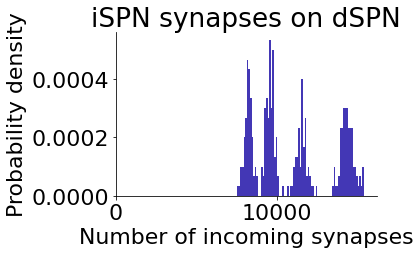

Wrote /home/zmd/Snudda/160000Sim/figures/Network-synapses-to-dSPN-from-iSPN.pdf


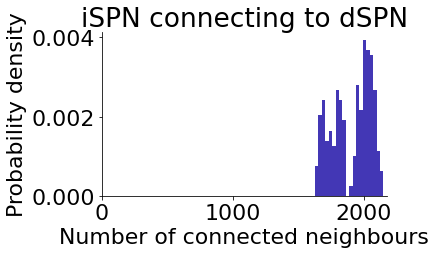

In [9]:
sa.plot_incoming_connections(neuron_type="dSPN", pre_type="iSPN", num_bins=20)

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 4668/75169
Counting connections
/home/zmd/Snudda/snudda/analyse/analyse.py:1419: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)
Requested: 10000000.0 calculated [1116473.]
Rejected (too large z-depth): 8883565
P(d<5e-05)=0.9955673758865248
P(d<0.0001)=0.9550780636446455


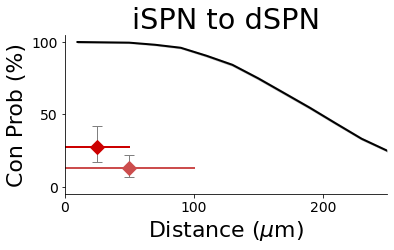

Wrote /home/zmd/Snudda/160000Sim/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf


In [10]:
sa.plot_connection_probability("iSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[13 / 47.0, 10 / 80.0],
                                exp_data_detailed=[(13, 47), (10, 80)],
                                y_max=y_max_H)

In [ ]:
Here we plot a histogram over the number of synapses between each pair of connected iSPN and dSPN.

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in Striatum : Keeping 4668/75169
Calculating max synapses
Calculating mean synapses
Plotting 8827453 connections


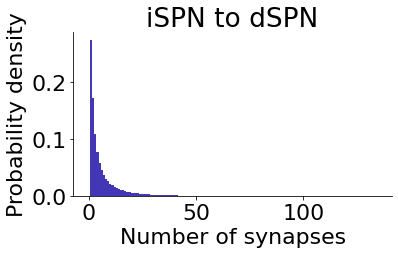

Wrote /home/zmd/Snudda/160000Sim/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.pdf


In [11]:
sa.plot_num_synapses_per_pair("iSPN", "dSPN")

## 2. Creating input for the network

In [14]:

import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("/home/zmd/Snudda/snudda/data/input_config","input-tinytest-v4.json"),
                 verbose=False)
si.position_file = os.path.join(network_path, "network-neuron-positions.hdf5")
si.network_config_file = os.path.join(network_path, "network-config.json")
#print(si.network_config_file)
si.generate()

Writing spikes to /home/zmd/Snudda/160000Sim/input-spikes.hdf5


In [15]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)

157449326 synapses, which is a lot, not loading them into memory!
Loading 160000 neurons with 157449326 synapses and 666724 gap junctions


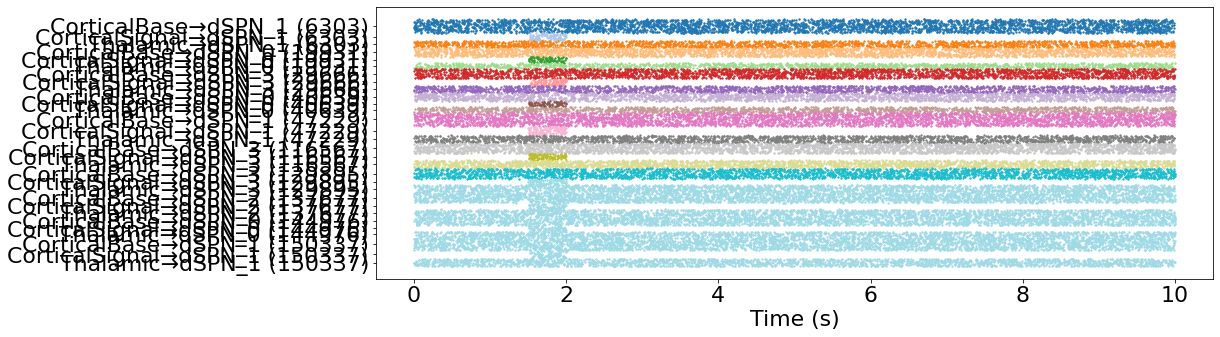

In [16]:
spi.plot_input("dSPN", 10, fig_size=(15,5))
#spi.plot_input_to_target([5,22,26])   # plot specific neurons
spi.input_data.close()

## 3. Plot simulation result

In [17]:
import os
network_file = os.path.join(network_path, "network-putative-synapses-MERGED.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "volt.txt")

from snudda.plotting import PlotTraces
pt = PlotTraces(volt_file_name, network_file=network_file)

Unable to guess ID, using 666.
2437164551 synapses, which is a lot, not loading them into memory!
Loading 160000 neurons with 2437164551 synapses and 1375409 gap junctions


Plotting traces: [40000, 40001, 40002, 40003, 40004, 40005, 40006, 40007, 40008, 40009, 40010, 40011, 40012, 40013, 40014, 40015, 40016, 40017, 40018, 40019]
Plotted 20 traces (total 160000)
Saving to figure Network-spikes-666-iSPN-dSPN-FSN-colour.pdf


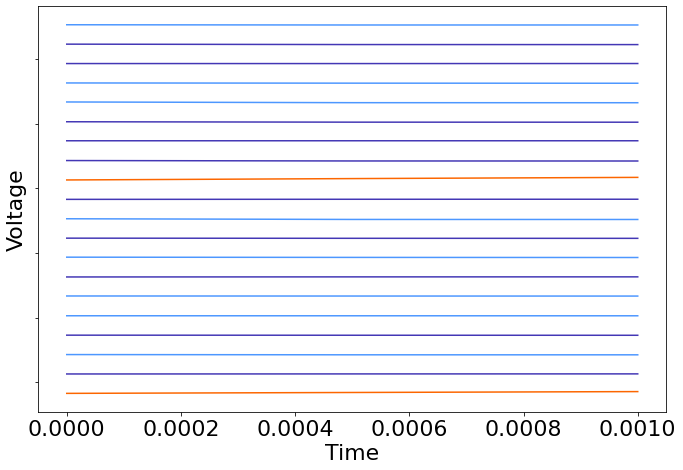

<Figure size 432x288 with 0 Axes>

In [30]:
pt.plot_traces([i for i in range(40000,40020)], figsize=(10,7))

If you also give network file, then the plot shows neuron types


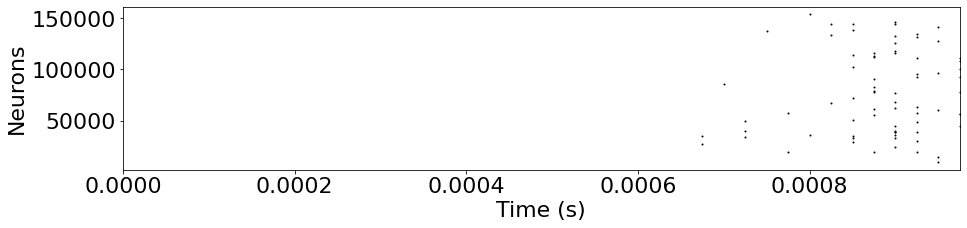

<Figure size 432x288 with 0 Axes>

Figure done


In [28]:
import os
network_file = os.path.join(network_path, "network-putative-synapses-MERGED.hdf5")
spike_file_name = os.path.join(network_path, "simulation", "network-output-spikes-160000-8-0-1ms-RoundRobin.txt")
from snudda.plotting import PlotSpikeRaster
end_time = 100
type_order = ["dspn",  "ispn", "fsn"]

spsr = PlotSpikeRaster(spike_file_name, skip_time=0,
                                     end_time=end_time,
                                     type_order=type_order, figsize=(15,3))